In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from mc_lib.rndm import RndmWrapper
from mc_lib.observable import RealObservable

import cy_ising
import cy_ising_cluster
import exact_ising

from utils import read_conformation
from utils import radius_of_gyration
from utils import mean_conections
from utils import R_to_norm
from utils import norm_to_R
import utils

In [2]:
def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)
    plt.axis('off')
    plt.show()

In [3]:
def generate_test_conf(W, H, N):
    struct = []
    for x in range(W * 2):
        for y in range(H):
            if x % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
                
    for i in range(N):
        offset = i * (W * 2 + 5)
        struct.append([offset+W*2, 0])
        for y in range(H):
            struct.append([offset+W*2+1, y])

        struct.append([offset+W*2+2, H-1])
        for y in range(H):
            struct.append([offset+W*2+3, H-1-y])

        struct.append([offset+W*2+4, 0])
        for x in range(offset+W*2+5, offset+W*2+5+W*2):
            for y in range(H):
                if (x - W*2-5 - offset) % 2 == 0:
                    struct.append([x, y])
                else:
                    struct.append([x, H-1-y])
        
    return struct

In [4]:
c1 = generate_test_conf(5, 20, 1)

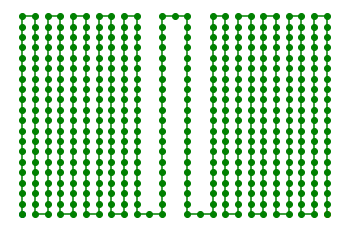

In [68]:
draw_conformation(c1)

In [69]:
c2 = generate_test_conf(5, 10, 2)

223


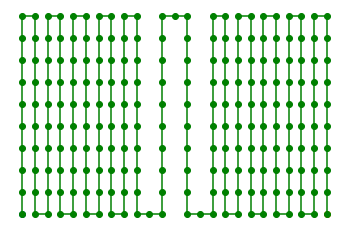

843


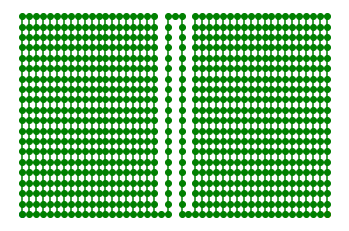

1407


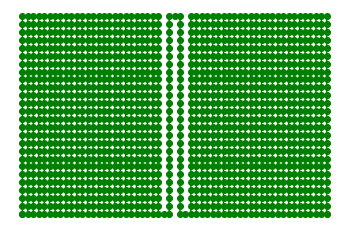

210


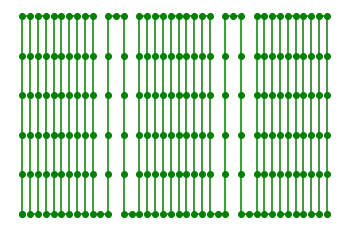

838


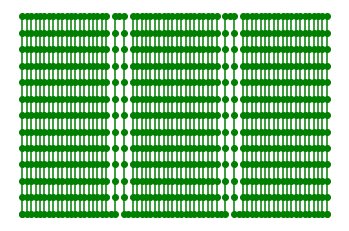

1400


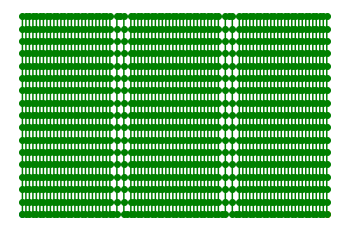

In [60]:
structures = []
for w in (5, 10, 13):
    c = generate_test_conf(w, w*2, 1)
    structures.append(c)
    print(len(c))
    draw_conformation(c)
    
for w in (5, 10, 13):
    c = generate_test_conf(w, w*4 // 3, 2)
    structures.append(c)
    print(len(c))
    draw_conformation(c)

In [63]:
for i in range(len(structures)):
    utils.save_sonformation(structures[i], 'Conformations/CLusterized_conformations/struct_conf_'+str(i)+'.dat')

In [5]:
conformations = utils.load_Conformations_from_dir('Conformations/CLusterized_conformations')

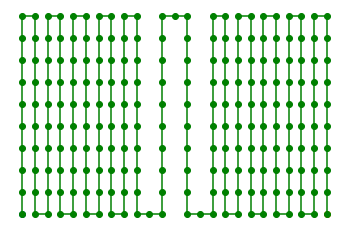

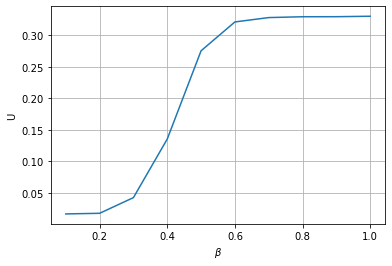

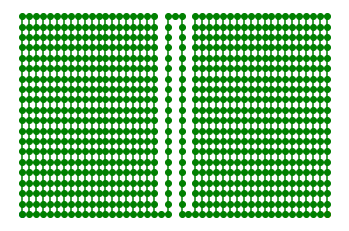

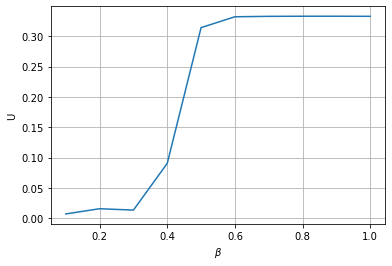

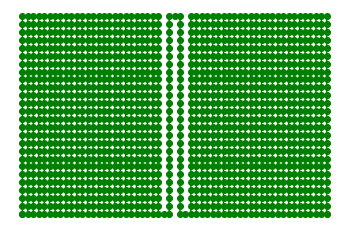

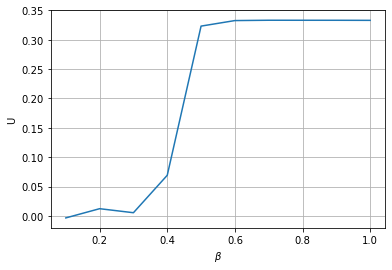

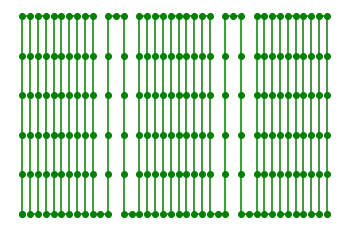

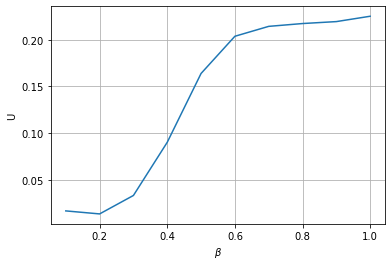

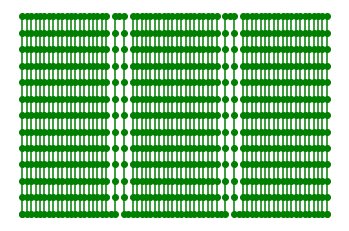

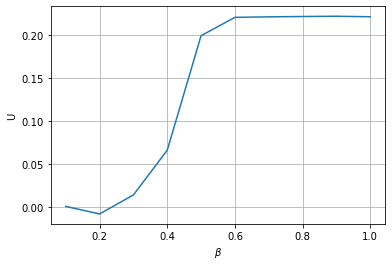

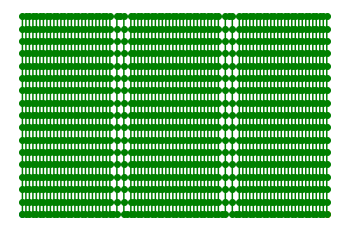

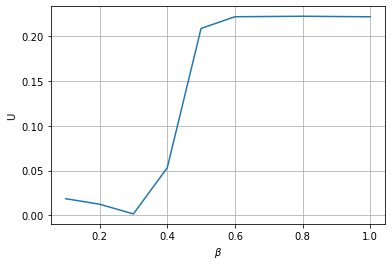

In [10]:
for c in conformations:
    draw_conformation(c.struct)
    plt.figure()
    plt.xlabel(r'$\beta$')
    plt.ylabel('U')
    plt.plot(c.betas, c.U)
    plt.grid(True)
    plt.show()

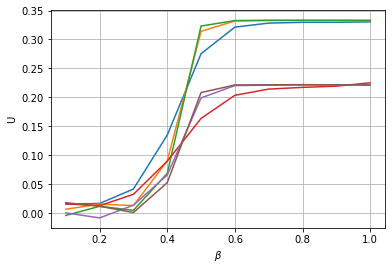

In [13]:
plt.figure()
for c in conformations:
    plt.xlabel(r'$\beta$')
    plt.ylabel('U')
    plt.plot(c.betas, c.U)
    plt.grid(True)

plt.show()